<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

What is the solution if a=1, and b=1, what is the solution if a=2 and b=2
  
 ## 1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $
   



In [ ]:
#Implementemos el método de bisección de  la librería scipy.
##Ingresamos la función, la cota inferior y la cota superior como parámetros.
from scipy import optimize
import sympy as sp
import numpy as np
primeraFuncion = lambda x,a,b: a*np.sqrt(x**2+1)+b*np.exp(x)*np.sin(x) - 7
#Hagámoslo para a=1 y b=1
argumentos1 = optimize.bisect(primeraFuncion,1,2.5,args=(1,1))
#Ahora veamos si a=2 y b=2
argumentos2 = optimize.bisect(primeraFuncion,3,5,args=(2,2))
print(f'Con a,b=1 la raíz es: {argumentos1}, con a,b=2 la ráiz es {argumentos2}')

Con a,b=1 la raíz es: 1.6287184949264883, con a,b=2 la ráiz es 3.1323505942436896


In [ ]:
#Ahora lo hacemos con el método de Newton.
#Derivemos con sympy
#Cpn a,b
def funcion1(x,a,b):
  f = a*sp.sqrt(x**2+1)+ b*sp.exp(x)*sp.sin(x)
  return f
x = sp.symbols('x')
a = sp.symbols('a')
b = sp.symbols('b')
y1 = funcion1(x,1,1)
yprima1 = sp.diff(y1)
y2 = funcion1(x,2,2)
yprima2 = sp.diff(y2)
print(yprima1,yprima2)

x/sqrt(x**2 + 1) + exp(x)*sin(x) + exp(x)*cos(x) 2*x/sqrt(x**2 + 1) + 2*exp(x)*sin(x) + 2*exp(x)*cos(x)


In [ ]:
#Transformar objeto de sympy a numpy
funcionLambda1 = sp.lambdify((x,a,b),yprima1,'numpy')
funcionLambda2 = sp.lambdify((x,a,b),yprima2,'numpy')

In [ ]:
#Ahora lo hacemos con el método de Newton.
#Definimos x0 = 2 que es un número cercano a la raíz
raizNewton1 = optimize.newton(primeraFuncion,2, fprime= funcionLambda1,args=(1,1))
raizNewton2 = optimize.newton(primeraFuncion,3,fprime= funcionLambda2,args=(2,2))
print(f'Con a,b=1 la raíz por newton es: {raizNewton1}, con a,b=2 la ráiz es {raizNewton2}')

Con a,b=1 la raíz por newton es: 1.6287184949270082, con a,b=2 la ráiz es 3.1323505942423657


In [ ]:
#Ahora resolvamos con el método de Punto Fijo.
def gdex1(x,a,b):
  return x - primeraFuncion(x,a,b)
raizPuntoFijo1 = optimize.fixed_point(gdex1,1.5,args=(1,1))
raizPuntoFijo2 = optimize.fixed_point(gdex1,3.12,args=(2,2))
print(f'Con a,b=1 la raíz por punto fijo es: {raizPuntoFijo1}, con a,b=2 la ráiz es {raizPuntoFijo2}')

Con a,b=1 la raíz por punto fijo es: 1.6287184949270082, con a,b=2 la ráiz es 3.1323505942424017


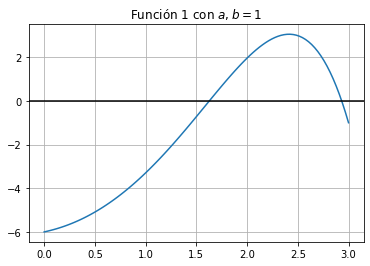

In [ ]:
#Veamos la gráfica para a,b=1
import matplotlib.pyplot as plt
x1= np.linspace(0,3,100)
y = lambda x2,a,b: a*np.sqrt(x2**2+1)+b*np.exp(x2)*np.sin(x2) - 7
yevaluada = y(x1,1,1)
plt.plot(x1,yevaluada);
plt.grid()
plt.axhline(y=0, xmin=0, xmax=3,color='black')
plt.title('Función 1 con $a,b=1$')
plt.show()

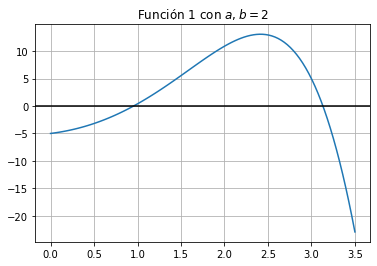

In [ ]:
#Veamos la gráfica para a,b=2
import matplotlib.pyplot as plt
x1 = np.linspace(0,3.5,100)
y = lambda x2,a,b: a*np.sqrt(x2**2+1)+b*np.exp(x2)*np.sin(x2) - 7
yevaluada2 = y(x1,2,2)
plt.plot(x1,yevaluada2);
plt.grid()
plt.axhline(y=0, xmin=0, xmax=3.5,color='black')
plt.title('Función 1 con $a,b=2$')
plt.show()

  
 ## 2. $a e^{x}-2= b\cos(e^x-2)$

In [ ]:
#Como es una función trascendental, no podemos despejar la x.
#Si pasamos todos los términos en un solo lado tenemos igualado a cero
##y podemos usar el método de bisección para hallar las raíces que serán
###los puntos de intersección.
def funcion(x,a,b):
  return a*np.exp(x) - 2 -b*np.cos(np.exp(x)-2)

argumentos3 = optimize.bisect(funcion,1,2,args=(1,1))
argumentos4 = optimize.bisect(funcion,-1,2,args=(2,2))
print(f'Con a,b=1 la raíz es: {argumentos3}, con a,b=2 la ráiz es {argumentos4}')

Con a,b=1 la raíz es: 1.0076239716563578, con a,b=2 la ráiz es 0.6931471805605725


In [ ]:
#Ahora veamos para el método de Newton
def funcion2(x,a,b):
  return a*sp.exp(x) - 2 -b*sp.cos(sp.exp(x)-2)

x = sp.symbols('x')
a = sp.symbols('a')
b = sp.symbols('b')
y1 = funcion1(x,1,1)
yprima1 = sp.diff(y1)
y2 = funcion1(x,2,2)
yprima2 = sp.diff(y2)
print(yprima1,yprima2)

x/sqrt(x**2 + 1) + exp(x)*sin(x) + exp(x)*cos(x) 2*x/sqrt(x**2 + 1) + 2*exp(x)*sin(x) + 2*exp(x)*cos(x)


In [ ]:
#Transformar objeto de sympy a numpy
funcionLambda1 = sp.lambdify((x,a,b),yprima1,'numpy')
funcionLambda2 = sp.lambdify((x,a,b),yprima2,'numpy')

In [ ]:
#Ahora lo hacemos con el método de Newton.
#Definimos x0 = 2 que es un número cercano a la raíz
raizNewton1 = optimize.newton(funcion, 1.5,fprime= funcionLambda1,args=(1,1))
raizNewton2 = optimize.newton(funcion, 0,fprime= funcionLambda2,args=(2,2))
print(f'Con a,b=1 la raíz por newton es: {raizNewton1}, con a,b=2 la ráiz es {raizNewton2}')

Con a,b=1 la raíz por newton es: 1.007623971460644, con a,b=2 la ráiz es 0.6931471731429254


In [ ]:
#Finalmente hagámoslo para el método de punto flotante
def gdex2(x,a,b):
  return x - funcion(x,a,b)
raizPuntoFijo3 = optimize.fixed_point(gdex2,1,args=(1,1))
raizPuntoFijo4 = optimize.fixed_point(gdex2,0.5
                                      ,args=(2,2))
print(f'Con a,b=1 la raíz por punto fijo es: {raizPuntoFijo3}, con a,b=2 la ráiz es {raizPuntoFijo4}')

Con a,b=1 la raíz por punto fijo es: 1.0076239716581368, con a,b=2 la ráiz es 0.6931471805599453


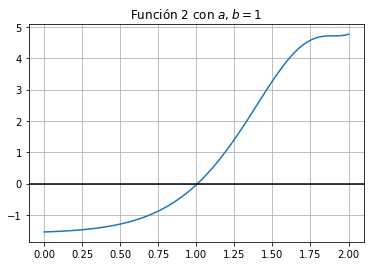

In [ ]:
#Veamos la gráfica para a,b=1
import matplotlib.pyplot as plt
x1= np.linspace(0,2,100)
y = lambda x: np.exp(x) - 2 - np.cos(np.exp(x)-2)
yevaluada = y(x1)
plt.plot(x1,yevaluada);
plt.grid()
plt.axhline(y=0, xmin=0, xmax=3,color='black')
plt.title('Función 2 con $a,b=1$')
plt.show()

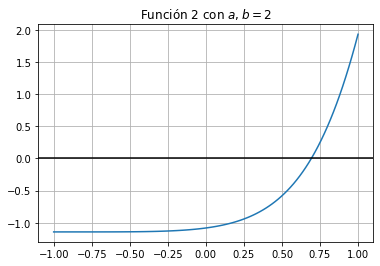

In [ ]:
#Veamos la gráfica para a,b=2
import matplotlib.pyplot as plt
x1= np.linspace(-1,1,100)
y = lambda x: 2*np.exp(x) - 2 - 2*np.cos(np.exp(x)-2)
yevaluada = y(x1)
plt.plot(x1,yevaluada);
plt.grid()
plt.axhline(y=0, xmin=0, xmax=3,color='black')
plt.title('Función 2 con $a,b=2$')
plt.show()

#3. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of  $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [ ]:
#Vamos a hallar el radio del planeta descubierto.
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def funcionMasa(R,rho,L):
  return 4*np.pi*rho*( 2*L**3 + (-2*L**3 - 2*L**2*R - L*R**2)*np.exp(-R/L))

def funcionMasaG(radioTierra,rhoTierra):
  return (1.75*radioTierra)**3*4*np.pi*rhoTierra/3

L = 6500E3
rho = 18000
rhoTierra = 5520
radioTierra = 6371E3
masaTierra = 972E24
masaPlaneta = funcionMasaG(radioTierra,rhoTierra)/masaTierra 
#ya que tenemos la masa del planeta podemos encontrar la raíz para la ecuación que relaciona las masas.
funcion = lambda R,rho,L: ((4*np.pi*rho*( 2*L**3 + (-2*L**3 - 2*L**2*R - L*R**2)*np.exp(-R/L))) - ((1.75*radioTierra)**3*4*np.pi*rhoTierra/3))/masaTierra
def gdex3(R,rho,L):
  return R - funcion(R,rho,L)
raiz = optimize.fixed_point(gdex3,1,args=(rho,L))
print(f'El radio del planeta es: {raiz}')

El radio del planeta es: 2447521670067.5435


ESTOS DOS ÚLTIMOS PUNTOS NO SE HACEN.
##3. **ACTIVITY** 
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

4. **ACTIVITY** 


It is known that light rays are deflected when they pass near by a gravitational field and that this deviation is proportional to the body mass which the light is interacting with and inversely proportional to the passing distance. 
Since it is common finding very massive structures in the universe and the measures that are done to study it involve photons, it makes sense to study what happens to a light source image when the rays get close to a grumpy object like a dark matter halo.  


In order to study the light deflection in these cases, it will be used the simplest model, gravitational lens theory, where the len is a very massive object. A sketch of a typical system is shown in the figure below. The source plane is the light source or image that is going to be affected,  $\eta$ is the distance from a image point to the line of sight and $\beta$ the subtended angle by the point. 
The lens plane corresponds to the mass that affects the light coming from the source, $\xi$ is the new image point distance to the line of sight, $\theta$ is the subtended angle by the new point position. Then, $\alpha$ is the deflection angle. 

Since from observations $\theta$ is known, the problem to be solved per pixel usually is 

\begin{equation}
\beta = \theta - \hat{\alpha}(\theta) 
\end{equation}

but $\alpha$ also depends on $\theta$ besides the len halo properties. This would allow construct the real image
from the distorted and magnified one. 

<img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/lente1.png?raw=1">

This equation can also be written in terms of distances 

\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi }) 
\end{equation}

The solution to the lens equation is easier to get if it is assumed that the len is axially symmetric. In this case, the deflection angle  takes the next form

$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

The quantity $\Sigma$ is the surface mass density, i.e., the len's mass enclosed inside $\xi$ circle per area unit.  
It is important to notice that the direction of $\alpha$ is the same as $\xi$ and consequently $\eta$. 


The problem to be solved is the next: Given the positions of a square find the image distorsion due to gravitational lensing, i.e., find the root of \xi in the trascendal equation it satisfies. Use the routines given below and all of 
the data for the len and image that is going to be distorted. 
